## 图像基本操作

![title](photo\lena_img.png)

### 数据读取-图像

- cv2.IMREAD_COLOR：彩色图像
- cv2.IMREAD_GRAYSCALE：灰度图像

In [ ]:
# 查看该notebook使用的环境
import sys
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np
print(sys.version)
print(sys.executable)
print(cv2.__version__)
# 由于使用的时jupyternotebook 所以此时的工作路径在打印出来的位置 后续相关的内容要使用绝对路径进行处理
print("当前工作目录"+os.getcwd())

In [58]:
import cv2 #opencv读取的格式是BGR
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline 
import cv2
# 相关数据放在notebook工作目录的photoOpencv文件夹下
img = cv2.imread('photoOpencv/cat.jpg', cv2.IMREAD_COLOR)

In [6]:
img

array([[[142, 151, 160],
        [146, 155, 164],
        [151, 160, 169],
        ...,
        [156, 172, 185],
        [155, 171, 184],
        [154, 170, 183]],

       [[107, 118, 126],
        [112, 123, 131],
        [117, 128, 136],
        ...,
        [155, 171, 184],
        [154, 170, 183],
        [153, 169, 182]],

       [[108, 119, 127],
        [112, 123, 131],
        [118, 129, 137],
        ...,
        [154, 170, 183],
        [153, 169, 182],
        [152, 168, 181]],

       ...,

       [[162, 186, 198],
        [157, 181, 193],
        [142, 166, 178],
        ...,
        [181, 204, 206],
        [170, 193, 195],
        [149, 172, 174]],

       [[140, 164, 176],
        [147, 171, 183],
        [139, 163, 175],
        ...,
        [167, 187, 188],
        [123, 143, 144],
        [104, 124, 125]],

       [[154, 178, 190],
        [154, 178, 190],
        [121, 145, 157],
        ...,
        [185, 198, 200],
        [130, 143, 145],
        [129, 142, 144]]

In [7]:
#图像的显示,也可以创建多个窗口
cv2.imshow('img',img)
# 等待时间，毫秒级，0表示任意键终止
cv2.waitKey(0) 
cv2.destroyAllWindows()

In [59]:
def cv_show(name,img):
    cv2.imshow(name,img) 
    cv2.waitKey(0) 
    cv2.destroyAllWindows()

In [9]:
img.shape

(414, 500, 3)

In [60]:
img=cv2.imread('photoOpencv/cat.jpg',cv2.IMREAD_GRAYSCALE)
img

array([[153, 157, 162, ..., 174, 173, 172],
       [119, 124, 129, ..., 173, 172, 171],
       [120, 124, 130, ..., 172, 171, 170],
       ...,
       [187, 182, 167, ..., 202, 191, 170],
       [165, 172, 164, ..., 185, 141, 122],
       [179, 179, 146, ..., 197, 142, 141]], dtype=uint8)

In [61]:
img.shape

(414, 500)

In [12]:
#图像的显示,也可以创建多个窗口
cv2.imshow('image',img) 
# 等待时间，毫秒级，0表示任意键终止
cv2.waitKey(10000) 
cv2.destroyAllWindows()

In [13]:
#保存
cv2.imwrite('photoOpencv/mycat.png',img)

True

In [14]:
type(img)

numpy.ndarray

In [15]:
img.size

207000

In [16]:
img.dtype

dtype('uint8')

### 数据读取-视频

- cv2.VideoCapture可以捕获摄像头，用数字来控制不同的设备，例如0,1。
- 如果是视频文件，直接指定好路径即可。

In [27]:
vc = cv2.VideoCapture('photoOpencv/test.mp4')
print(vc)

<VideoCapture 000001918863D630>


In [ ]:
# vc.read()
# 是 OpenCV 中用于从视频流（例如摄像头或视频文件）读取帧的方法。vc 是一个 cv2.VideoCapture 对象，它表示一个视频捕获设备或视频文件。
# 调用 vc.read() 会返回两个值：
# ret：一个布尔值，表示是否成功读取帧。如果读取成功，则返回 True，否则返回 False。
# frame：读取到的帧（图像），如果 ret 为 True，则 frame 包含读取到的图像数据；如果 ret 为 False，则 frame 为 None。

In [30]:
# 检查是否打开正确
if vc.isOpened():
    open, frame = vc.read()
else:
    open = False
open

True

In [19]:
# cv2.cvtColor(src, code)
# 参数
# src：输入图像，应该是一个多通道图像（例如，BGR 图像）。
# code：颜色空间转换代码，指定将图像从一种颜色空间转换到另一种颜色空间的类型。

# 常用的颜色空间转换代码
# cv2.COLOR_BGR2GRAY：将 BGR 图像转换为灰度图像。
# cv2.COLOR_BGR2RGB：将 BGR 图像转换为 RGB 图像。
# cv2.COLOR_BGR2HSV：将 BGR 图像转换为 HSV 图像。
# cv2.COLOR_RGB2BGR：将 RGB 图像转换为 BGR 图像。
# cv2.COLOR_GRAY2BGR：将灰度图像转换为 BGR 图像。

In [31]:
while open:
    ret, frame = vc.read()
    if frame is None:
        break
    if ret == True:
        gray = cv2.cvtColor(frame,  cv2.COLOR_BGR2GRAY)
        cv2.imshow('result', gray)
        # 等待100毫秒以及是否按下了ESC键
        if cv2.waitKey(100) & 0xFF == 27:
            break
vc.release()
cv2.destroyAllWindows()

### 截取部分图像数据

In [32]:
img=cv2.imread('photoOpencv/cat.jpg')
cat=img[0:50,0:200] 
cv_show('cat',cat)

### 颜色通道提取

In [33]:
b,g,r=cv2.split(img)

In [34]:
r

array([[160, 164, 169, ..., 185, 184, 183],
       [126, 131, 136, ..., 184, 183, 182],
       [127, 131, 137, ..., 183, 182, 181],
       ...,
       [198, 193, 178, ..., 206, 195, 174],
       [176, 183, 175, ..., 188, 144, 125],
       [190, 190, 157, ..., 200, 145, 144]], dtype=uint8)

In [35]:
r.shape

(414, 500)

In [36]:
img=cv2.merge((b,g,r))
img.shape

(414, 500, 3)

In [ ]:
# 在 OpenCV 中，图像通常表示为一个多维数组（NumPy 数组）。对于彩色图像，数组的形状是 (height, width, channels)，其中：
#
# height 是图像的高度（以像素为单位）。
# width 是图像的宽度（以像素为单位）。
# channels 是图像的通道数。对于 BGR 彩色图像，有三个通道：
# 第0个通道（cur_img[:,:,0]）：蓝色通道。
# 第1个通道（cur_img[:,:,1]）：绿色通道。
# 第2个通道（cur_img[:,:,2]）：红色通道。

In [37]:
# 只保留R
cur_img = img.copy()
cur_img[:,:,0] = 0
cur_img[:,:,1] = 0
cv_show('R',cur_img)

In [38]:
# 只保留G
cur_img = img.copy()
cur_img[:,:,0] = 0
cur_img[:,:,2] = 0
cv_show('G',cur_img)

In [39]:
# 只保留B
cur_img = img.copy()
cur_img[:,:,1] = 0
cur_img[:,:,2] = 0
cv_show('B',cur_img)

### 边界填充

In [ ]:
# OpenCV中用于在图像周围添加边框的函数。这个函数可以在图像的四边添加不同类型和宽度的边框。它通常用于数据增强或图像预处理。
# cv2.copyMakeBorder(src, top, bottom, left, right, borderType, value=None)
# 参数
# src：输入图像。
# top：在图像顶部添加的边框宽度（以像素为单位）。
# bottom：在图像底部添加的边框宽度（以像素为单位）。
# left：在图像左侧添加的边框宽度（以像素为单位）。
# right：在图像右侧添加的边框宽度（以像素为单位）。
# borderType：边框类型，可以是以下值之一：
# cv2.BORDER_CONSTANT：添加恒定颜色的边框，颜色由 value 参数指定。
# cv2.BORDER_REFLECT：边框是对图像的镜像反射。
# cv2.BORDER_REFLECT_101 或 cv2.BORDER_DEFAULT：类似于 cv2.BORDER_REFLECT，但更改了反射的起始位置。
# cv2.BORDER_REPLICATE：边框是图像边缘的复制。
# cv2.BORDER_WRAP：边框是图像的环绕。
# value：边框颜色，仅在 borderType 为 cv2.BORDER_CONSTANT 时使用。默认为黑色。

In [40]:
top_size,bottom_size,left_size,right_size = (50,50,50,50)

replicate = cv2.copyMakeBorder(img, top_size, bottom_size, left_size, right_size, borderType=cv2.BORDER_REPLICATE)
reflect = cv2.copyMakeBorder(img, top_size, bottom_size, left_size, right_size,cv2.BORDER_REFLECT)
reflect101 = cv2.copyMakeBorder(img, top_size, bottom_size, left_size, right_size, cv2.BORDER_REFLECT_101)
wrap = cv2.copyMakeBorder(img, top_size, bottom_size, left_size, right_size, cv2.BORDER_WRAP)
constant = cv2.copyMakeBorder(img, top_size, bottom_size, left_size, right_size,cv2.BORDER_CONSTANT, value=0)

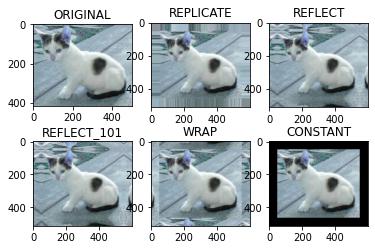

In [41]:
import matplotlib.pyplot as plt
plt.subplot(231), plt.imshow(img, 'gray'), plt.title('ORIGINAL')
plt.subplot(232), plt.imshow(replicate, 'gray'), plt.title('REPLICATE')
plt.subplot(233), plt.imshow(reflect, 'gray'), plt.title('REFLECT')
plt.subplot(234), plt.imshow(reflect101, 'gray'), plt.title('REFLECT_101')
plt.subplot(235), plt.imshow(wrap, 'gray'), plt.title('WRAP')
plt.subplot(236), plt.imshow(constant, 'gray'), plt.title('CONSTANT')

plt.show()

### 数值计算

In [45]:
img_cat=cv2.imread('photoOpencv/cat.jpg')
img_dog=cv2.imread('photoOpencv/dog.jpg')

In [46]:
# img_cat 图像的前5行、所有列、以及第0个通道（通常是蓝色通道）的像素值。
img_cat2= img_cat +10
img_cat[:5,:,0]

array([[142, 146, 151, ..., 156, 155, 154],
       [107, 112, 117, ..., 155, 154, 153],
       [108, 112, 118, ..., 154, 153, 152],
       [139, 143, 148, ..., 156, 155, 154],
       [153, 158, 163, ..., 160, 159, 158]], dtype=uint8)

In [50]:
img_cat2[:5,:,0]

array([[152, 156, 161, ..., 166, 165, 164],
       [117, 122, 127, ..., 165, 164, 163],
       [118, 122, 128, ..., 164, 163, 162],
       [149, 153, 158, ..., 166, 165, 164],
       [163, 168, 173, ..., 170, 169, 168]], dtype=uint8)

In [48]:
# 当进行像素值运算时，例如将两个图像相加，如果结果超出了 0 到 255 的范围，结果会自动取模 256。
(img_cat + img_cat2)[:5,:,0]

array([[ 38,  46,  56, ...,  66,  64,  62],
       [224, 234, 244, ...,  64,  62,  60],
       [226, 234, 246, ...,  62,  60,  58],
       [ 32,  40,  50, ...,  66,  64,  62],
       [ 60,  70,  80, ...,  74,  72,  70]], dtype=uint8)

In [49]:
# cv2.add() 函数用于将两个图像逐元素相加。与直接使用 NumPy 的加法运算不同，cv2.add() 函数会处理溢出问题，不会对 256 取模，而是将结果限制在 0 到 255 的范围内。
cv2.add(img_cat,img_cat2)[:5,:,0]

array([[255, 255, 255, ..., 255, 255, 255],
       [224, 234, 244, ..., 255, 255, 255],
       [226, 234, 246, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

### 图像融合

In [52]:
img_cat + img_dog

ValueError: operands could not be broadcast together with shapes (414,500,3) (429,499,3) 

In [53]:
img_cat.shape

(414, 500, 3)

In [54]:
img_dog = cv2.resize(img_dog, (500, 414))
img_dog.shape

(414, 500, 3)

In [ ]:
# cv2.addWeighted 是 OpenCV 中用于图像加权混合的函数。它可以将两幅图像按指定的权重进行线性混合。这个函数的常见用途包括图像的透明叠加和混合。
# cv2.addWeighted(src1, alpha, src2, beta, gamma)
# 参数
# src1：第一幅输入图像。
# alpha：第一幅图像的权重。
# src2：第二幅输入图像。
# beta：第二幅图像的权重。
# gamma：加到最终混合图像上的一个标量值（通常是 0）。

In [55]:
res = cv2.addWeighted(img_cat, 0.4, img_dog, 0.6, 0)

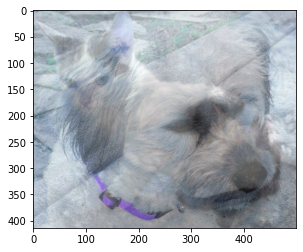

In [56]:
plt.imshow(res)

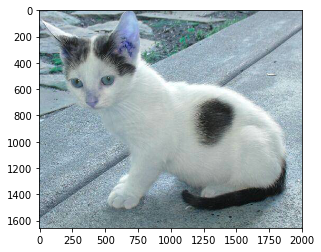

In [116]:
# cv2.resize 函数用于调整图像的大小。通过指定缩放因子 fx 和 fy，可以在不指定目标大小的情况下按比例缩放图像。fx 是图像宽度的缩放因子，fy 是图像高度的缩放因子。
#  表示不直接指定目标大小。这种情况下，实际的目标大小由 fx 和 fy 参数决定
res = cv2.resize(img, (0, 0), fx=4, fy=4)
plt.imshow(res)

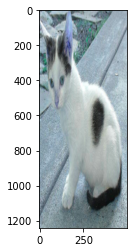

In [57]:
res = cv2.resize(img, (0, 0), fx=1, fy=3)
plt.imshow(res)